In [1]:
import os
import numpy as np
import mvpa2
from mvpa2.suite import *

bold_fname = os.path.join('..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', 'data', 'qub', 'struct', 'final_mask_w.hdr')
ds = fmri_dataset(bold_fname, mask=mask_fname)
ds.shape

/home/niall/anaconda2/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `scipy.weave` is deprecated, use `weave` instead!
  warnings.warn(depdoc, DeprecationWarning)
/home/niall/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


 * Please note: warnings are printed only once, but underlying problem might occur many times *


/home/niall/anaconda2/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `scipy.linalg.calc_lwork` is deprecated!

calc_lwork was an internal module in Scipy and has been removed.

Several functions in scipy.linalg.lapack have *_lwork variants
that perform the lwork calculation (from Scipy >= 0.15.0), or
allow passing in LWORK=-1 argument to perform the computation.


  warnings.warn(depdoc, DeprecationWarning)


(1351, 65159)

In [2]:
len(ds.samples[0])

65159

In [3]:
for value in ds[1].samples:
    print(value)

[32 28 29 ..., 11 11 11]


In [4]:
len(ds.samples[0])

65159

In [5]:
len(ds[:, 1].samples)

1351

In [18]:
import numpy as np

#lets compute the average
mean_results = []

range_max = ds.nfeatures
#range_max = 1000

#ds.nfeatures
for num in range(0, range_max):
    mean_results.insert(num, np.mean(ds[:, num].samples))
    
#remove
# for num in range(1000, ds.nfeatures):
#     mean_results.insert(num, 0)

print("done")

done


In [19]:
#check our size is correct
len(mean_results)

65159

In [20]:
np.amax(mean_results)

985.01110288675056

In [21]:
for i, s in enumerate(mean_results):
    mean_results[i] = int(s)

In [22]:
mean_matrix = np.reshape(mean_results,(-1,len(mean_results)))

In [23]:
mean_matrix

array([[30, 28, 31, ..., 10, 11, 10]])

In [24]:
result_ds = Dataset(mean_matrix)
result_ds.shape

(1, 65159)

In [25]:
overlay_data = map2nifti(ds, result_ds)

In [26]:
overlay_data.to_filename('mytest.nii.gz')

In [27]:
new_ds = fmri_dataset(overlay_data, mask=mask_fname)
new_ds.shape

(1, 65159)

In [34]:
mri_args = {
    'background' : os.path.join('..', 'data', 'qub', 'struct', 's005a1001.hdr'),
    'cmap_bg' : 'gray',
    'cmap_overlay' : 'autumn', # YlOrRd_r # pl.cm.autumn
    'interactive' : cfg.getboolean('examples', 'interactive', True),
    }

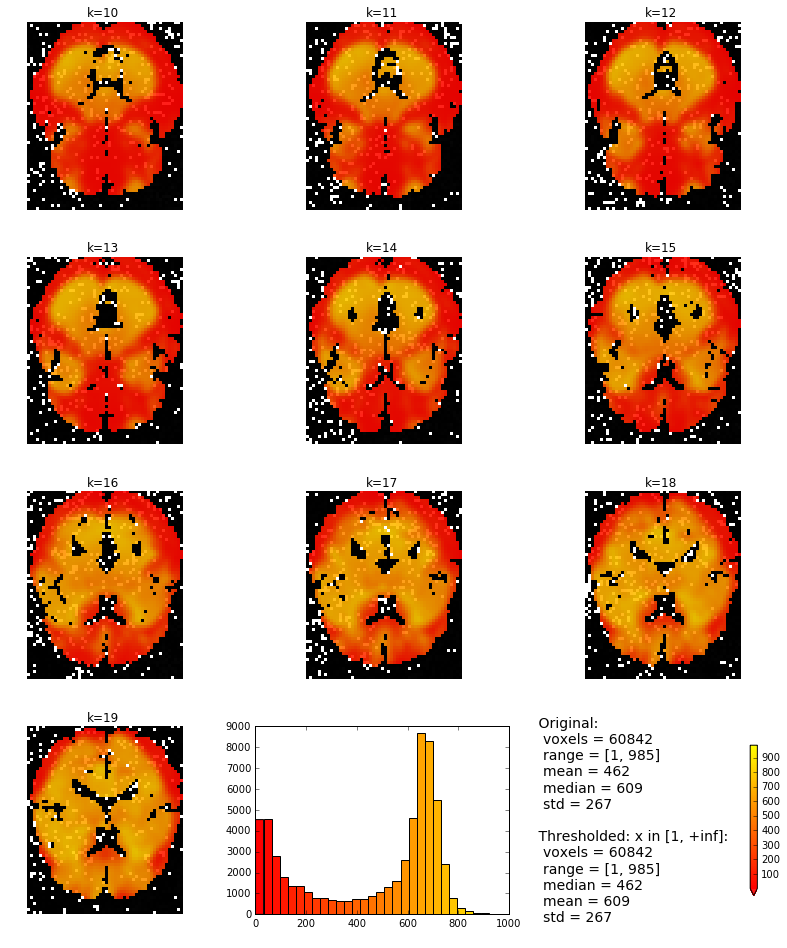

In [37]:
%matplotlib inline

fig = plot_lightbox(overlay=overlay_data, vlim=(0, None), slices=range(10,20), **mri_args)

In [ ]:
from brainPlotter import plot_lightbox_new

fig = plot_lightbox_new(overlay=overlay_data, **mri_args)